<a href="https://colab.research.google.com/github/jmcarbo/medicalimages/blob/main/Pr%C3%A0ctica_14_Imatge_biom%C3%A8dica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pràctica 14 - Imatge biomèdica

En aquesta pràctica repassarem les etapes del fluix de treball amb imatges digitals en medicina

## Captura

Seleccionem i descarreguem grups de 10 imatges d'un seguit de categories "image_classes" amb l'utilitat bbid.

Feu també una ullada a la base de dades d'imatges mèdiques: http://openi.nlm.nih.gov

In [ ]:
import os
import shutil

if not os.path.isfile("bbid.py"):
  os.system("wget https://raw.githubusercontent.com/ostrolucky/Bulk-Bing-Image-downloader/master/bbid.py")
  os.system("chmod +x bbid.py")
if os.path.isdir('images'):
  shutil.rmtree('images')
if os.path.isdir('features'):
  shutil.rmtree('features')
os.mkdir("images")
os.mkdir("features")
image_classes = ["femur", 
                 "pulmonary carcinoma", 
                 "enphysema radiography", 
                 "melanoma", 
                 "erithema nodosum"]
for i in image_classes:
  os.mkdir( "images/" + i)
  os.mkdir( "features/" + i)

In [ ]:
for i in image_classes:
  os.system(f'./bbid.py -s "{i} dicom" -o "images/{i}" --limit 10')

## Emmagatzemament

Mostrem les imatges emmagatzemades que acabem de capturar.

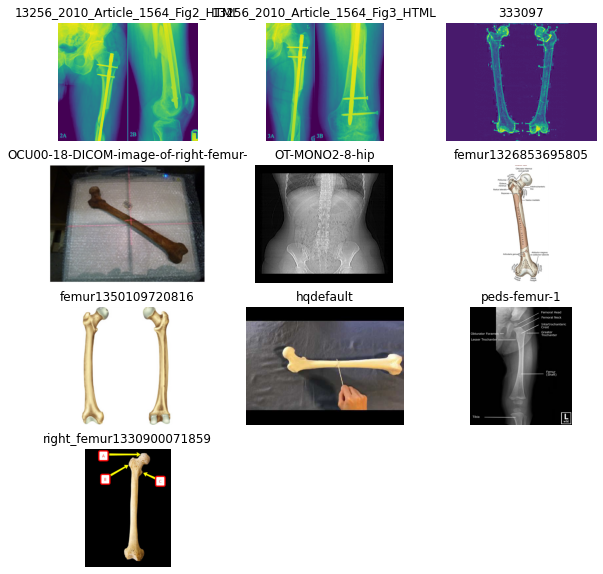

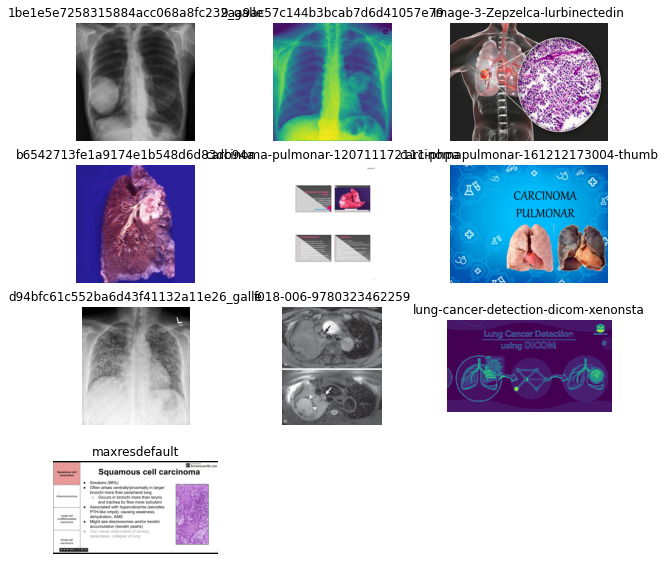

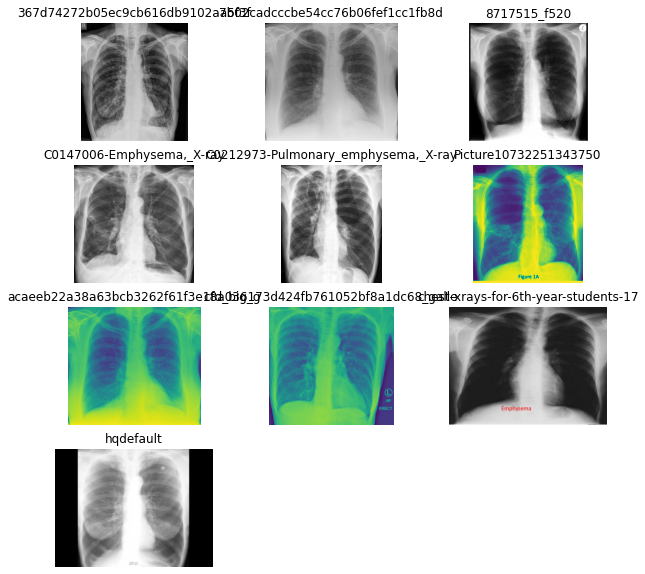

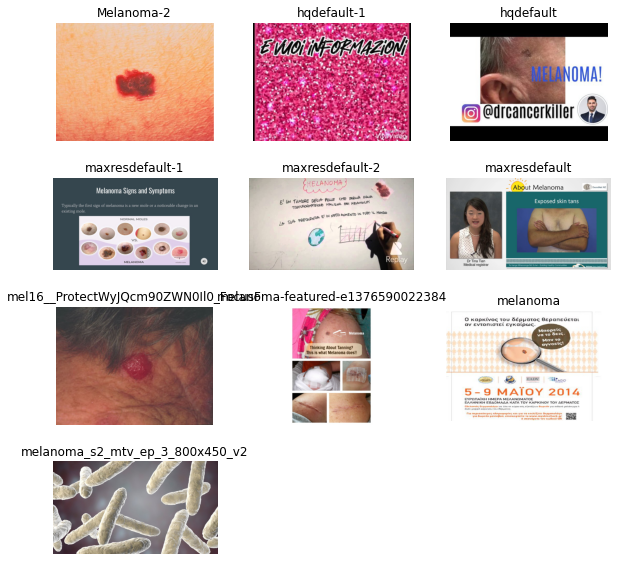

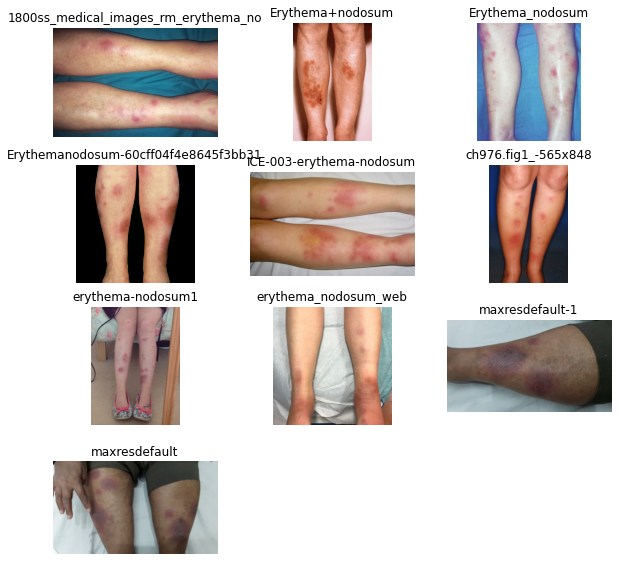

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np


for ic in image_classes:
  
  plt.figure(figsize=(10, 10))
  plt.title(ic)
  i = 0
  for imgs in sorted(Path("./images/"+ic).rglob("**/*.*")):
    ax = plt.subplot(4, 3, i + 1)
    img = Image.open(imgs)
    plt.imshow(np.array(img).astype("uint8"))
    plt.title(imgs.stem)
    plt.axis("off")
    i = i + 1

L'arxiu amb la imatge conté informació addicional en format EXIF

In [ ]:
from PIL.ExifTags import TAGS
im = Image.open("/content/images/erithema nodosum/ch976.fig1_-565x848.jpg")
exifdata=im.getexif()
for tag_id in exifdata:
  tag = TAGS.get(tag_id, tag_id)
  data = exifdata.get(tag_id)
  # decode bytes 
  #if isinstance(data, bytes):
  #    data = data.decode()
  print(f"{tag:25}: {data}")


ExifVersion              : b'0221'
ComponentsConfiguration  : b'\x01\x02\x03\x00'
ShutterSpeedValue        : (393216, 65536)
DateTimeOriginal         : 2007:03:07 13:42:14
DateTimeDigitized        : 2007:03:07 13:42:14
ApertureValue            : (565248, 65536)
ExposureBiasValue        : (0, 1)
MeteringMode             : 5
UserComment              : b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x

## Recuperació

In [ ]:
!git clone https://github.com/matsui528/sis.git
!cd sis && pip install -r requirements.txt

Cloning into 'sis'...
remote: Enumerating objects: 31, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 147 (delta 11), reused 24 (delta 10), pack-reused 116
Receiving objects: 100% (147/147), 26.59 KiB | 5.32 MiB/s, done.
Resolving deltas: 100% (74/74), done.


553467904/553467096 [==============================] - 4s 0us/step


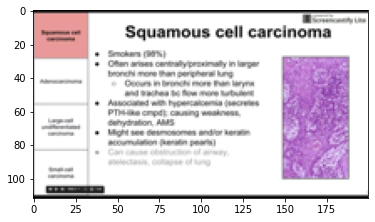

In [ ]:
from PIL import Image
from sis.feature_extractor import FeatureExtractor
from pathlib import Path
import numpy as np
from matplotlib.pyplot import imshow


#%matplotlib inline


fe = FeatureExtractor()

for img_path in sorted(Path("./images").rglob("**/*.*")):
    #print(img_path)  # e.g., ./static/img/xxx.jpg
    im=Image.open(img_path)
    size=200,200
    im.thumbnail(size)
    imshow(np.asarray(im))
    feature = fe.extract(img=Image.open(img_path))
    feature_path = str(img_path).replace("images/", "features/")  
    np.save(feature_path, feature)

In [ ]:
import numpy as np
from PIL import Image
from sis.feature_extractor import FeatureExtractor
from datetime import datetime
from pathlib import Path


# Read image features
fe = FeatureExtractor()
features = []
img_paths = []
for feature_path in Path("./features/").glob("**/*.npy"):
  features.append(np.load(feature_path))
  img_paths.append(str(feature_path).replace("features/", "images/").replace(".npy",""))
features = np.array(features)
img = Image.open("/content/images/erithema nodosum/Erythema+nodosum.jpg")  # PIL image
query = fe.extract(img)
dists = np.linalg.norm(features-query, axis=1)  # L2 distances to features
ids = np.argsort(dists)[:30]  # Top 30 results
scores = [(dists[id], img_paths[id]) for id in ids]
scores


[(0.0, 'images/erithema nodosum/Erythema+nodosum.jpg'),
 (0.7713075, 'images/erithema nodosum/Erythema_nodosum.JPG'),
 (0.8160593,
  'images/erithema nodosum/Erythemanodosum-60cff04f4e8645f3bb31.jpg'),
 (0.831333, 'images/erithema nodosum/ch976.fig1_-565x848.jpg'),
 (0.9390023, 'images/erithema nodosum/ICE-003-erythema-nodosum.jpeg'),
 (0.94708216, 'images/erithema nodosum/erythema_nodosum_web.jpg'),
 (0.99511695, 'images/erithema nodosum/maxresdefault.jpg'),
 (1.0118027,
  'images/erithema nodosum/1800ss_medical_images_rm_erythema_no.jpg'),
 (1.0898606, 'images/erithema nodosum/erythema-nodosum1.jpg'),
 (1.1080053, 'images/femur/13256_2010_Article_1564_Fig2_HTML.jpg'),
 (1.1646967, 'images/erithema nodosum/maxresdefault-1.jpg'),
 (1.170365, 'images/melanoma/mel16__ProtectWyJQcm90ZWN0Il0_FocusF.jpg'),
 (1.1760656,
  'images/pulmonary carcinoma/1be1e5e7258315884acc068a8fc232_galle.jpg'),
 (1.1828892, 'images/enphysema radiography/hqdefault.jpg'),
 (1.1860101, 'images/pulmonary carcinoma

## Processat

Podem representar les imatges pels seus histogrames de distribució pixels per densitat

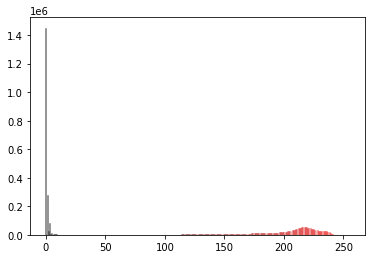

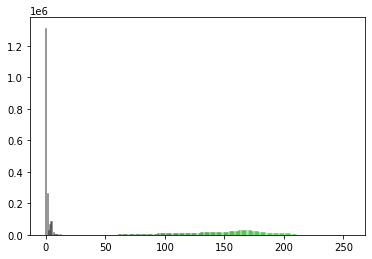

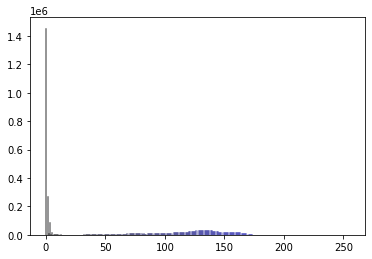

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

def getRed(redVal):
    return '#%02x%02x%02x' % (redVal, 0, 0)

def getGreen(greenVal):
    return '#%02x%02x%02x' % (0, greenVal, 0)

def getBlue(blueVal):
    return '#%02x%02x%02x' % (0, 0, blueVal)
 
# Create an Image with specific RGB value

image = Image.open("/content/images/erithema nodosum/Erythemanodosum-60cff04f4e8645f3bb31.jpg")

# Modify the color of two pixels
image.putpixel((0,1), (1,1,5))
image.putpixel((0,2), (2,1,5))

# Display the image
image.show()

# Get the color histogram of the image
histogram = image.histogram()

# Take only the Red counts
l1 = histogram[0:256]

# Take only the Blue counts
l2 = histogram[256:512]

# Take only the Green counts
l3 = histogram[512:768]

plt.figure(0)

# R histogram

for i in range(0, 256):
    plt.bar(i, l1[i], color = getRed(i), edgecolor=getRed(i), alpha=0.3)

# G histogram

plt.figure(1)

for i in range(0, 256):
    plt.bar(i, l2[i], color = getGreen(i), edgecolor=getGreen(i),alpha=0.3)


# B histogram
plt.figure(2)
for i in range(0, 256):
    plt.bar(i, l3[i], color = getBlue(i), edgecolor=getBlue(i),alpha=0.3)

plt.show()

### Millora de la imatge

In [ ]:
from PIL import Image, ImageFilter, ImageEnhance, ImageDraw

import os, sys

# vars
#path = "/path/to/your/images/"

# Read or Write files (https://docs.python.org/2/library/os.html)
#dirs = os.listdir(path)


source = Image.open("/content/images/erithema nodosum/Erythemanodosum-60cff04f4e8645f3bb31.jpg")
f, e = os.path.splitext("/content/images/erithema nodosum/Erythemanodosum-60cff04f4e8645f3bb31.jpg")

#
# Two image source inputs filter separately with DETAIL and
# FIND_EDGES filters.
#
# http://pillow.readthedocs.io/en/3.4.x/reference/ImageFilter.html
#
filter1 = source.filter(ImageFilter.DETAIL)
filter2 = source.filter(ImageFilter.FIND_EDGES)

#
# One image with DETAIL filtered and the second image with FIND_EDGES
# filtered. Two filtered image blends together with alpha 0.1 overlays.
# http://pillow.readthedocs.io/en/3.4.x/reference/Image.html?highlight=blend#PIL.Image.blend
#
compose = Image.blend(filter1, filter2, alpha=.1)

#
# Taking from the first image blend (compose) and blend it again with the
# SMOOTH filter as a new image source input. Alpha is 0.1 overlays.
#
filter3 = source.filter(ImageFilter.SMOOTH)
blend = Image.blend(compose, filter3, alpha=.1)

#
# The final blending (blend) is move to enhancing stage.
# This stage is to enhance the image COLOR with value 1.5 (0.0).
# IMAGE > enhanced > COLOR
#
# http://pillow.readthedocs.io/en/3.4.x/reference/ImageEnhance.html?highlight=ImageEnhance#PIL.ImageEnhance.Color
#
imageColor = ImageEnhance.Color(blend)
renderStage1 = imageColor.enhance(1.5)

#
# This stage is to enhance the image CONTRAST with value 1.1 (0.0).
# IMAGE(color) > enhanced > CONTRAST
#
# http://pillow.readthedocs.io/en/3.4.x/reference/ImageEnhance.html?highlight=ImageEnhance#PIL.ImageEnhance.Contrast
#
imageContrast = ImageEnhance.Contrast(renderStage1)
renderStage2 = imageContrast.enhance(1.1)

#
# This stage is to enhance the image CONTRAST with value 1.1 (0.0).
# IMAGE(contrast) > enhanced > BRIGHTNESS
#
# http://pillow.readthedocs.io/en/3.4.x/reference/ImageEnhance.html?highlight=ImageEnhance#PIL.ImageEnhance.Brightness
#
imageBrightness = ImageEnhance.Brightness(renderStage2)
renderFinal = imageBrightness.enhance(1.1)

#
# Final, write to a new image file
# File Format is JPEG with Quality 100
renderFinal.save(f + '_enhanced.jpg', 'JPEG', quality=100)


In [ ]:
im=Image.open("/content/images/erithema nodosum/Erythemanodosum-60cff04f4e8645f3bb31_enhanced.jpg")
im.size
im2 = im.resize((500,500))
im2.save("imatgefinal.tiff")

La revista mèdica us indicarà:

- La grandària en cm: 10inches
- Els dpi (dot per inch): 100dpi
- Alternativament els pixels en cas 1000px X 1000px
- El format de la imatge

### Dimensions de la imatge

In [ ]:
!pip install ISR

     |████████████████████████████████| 86.3MB 44kB/s 
     |████████████████████████████████| 450kB 49.2MB/s 
     |████████████████████████████████| 3.8MB 42.5MB/s 
     |████████████████████████████████| 51kB 4.9MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=cf97ecc7776e397fd5db30ffaa23fc5919b771bb7def3c81be3d1d0d17819fe2
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.12.1 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorboard 2.4.1
    Uninstalling tensorboard-2.4.1:
      Successfully uninstal

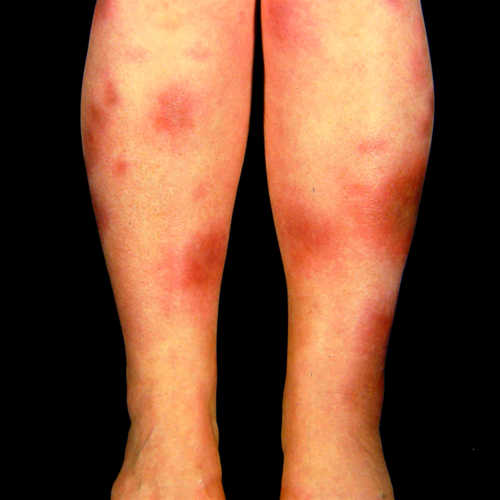

In [ ]:
import numpy as np
from PIL import Image

img = Image.open('/content/imatgefinal.tiff')
img

In [ ]:
# Uncomment if using local repo
# import sys
# sys.path.append('..')
from ISR.models import RDN, RRDN

#model = RDN(weights='noise-cancel')
#model = RRDN(weights='gans')
#model = RDN(weights='psnr-small')
model = RDN(weights='psnr-large')

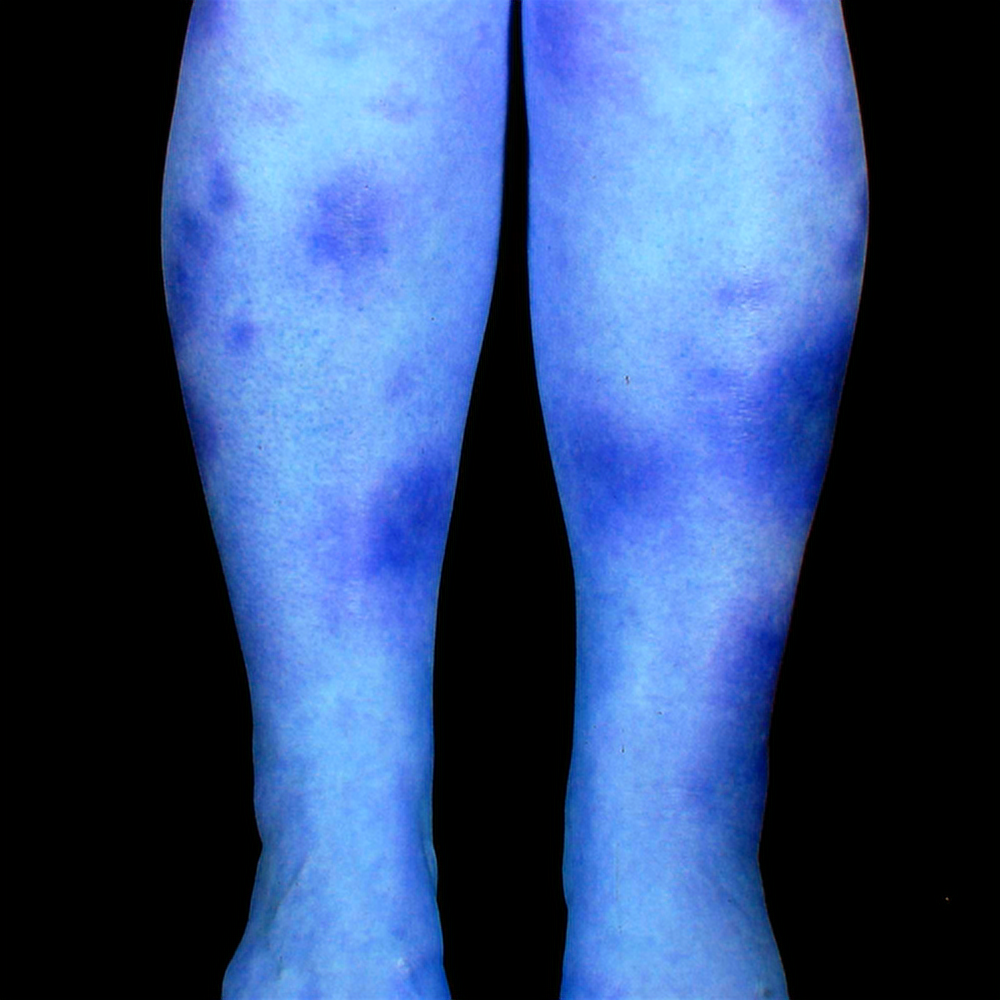

In [ ]:
sr_img = model.predict(np.array(img))
Image.fromarray(sr_img)

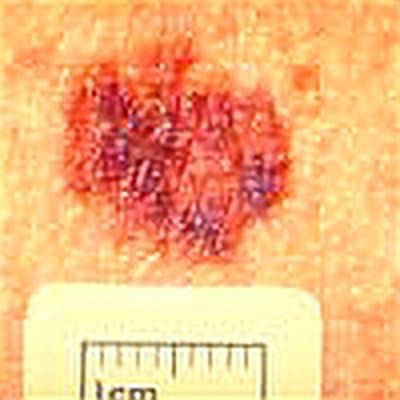

In [ ]:
im = Image.fromarray(sr_img)
im.size
im.resize((400,400))

In [ ]:
im.resize((500,500)).save("bla.jpg", dpi=(400, 400))

### Correcció del color

In [ ]:
import cv2 as cv
import numpy as np

def show(final):
    print('display')
    cv.imshow('Temple', final)
    cv.waitKey(0)
    cv.destroyAllWindows()

# Insert any filename with path
img = cv.imread('/content/imatgefinal.tiff')
def white_balance(img):
    result = cv.cvtColor(img, cv.COLOR_BGR2LAB)
    avg_a = np.average(result[:, :, 1])
    avg_b = np.average(result[:, :, 2])
    result[:, :, 1] = result[:, :, 1] - ((avg_a - 128) * (result[:, :, 0] / 255.0) * 1.1)
    result[:, :, 2] = result[:, :, 2] - ((avg_b - 128) * (result[:, :, 0] / 255.0) * 1.1)
    result = cv.cvtColor(result, cv.COLOR_LAB2BGR)
    return result

balanced_img = np.zeros_like(img) #Initialize final image

for i in range(3): #i stands for the channel index 
    hist, bins = np.histogram(img[..., i].ravel(), 256, (0, 256))
    bmin = np.min(np.where(hist>(hist.sum()*0.0005)))
    bmax = np.max(np.where(hist>(hist.sum()*0.0005)))
    balanced_img[...,i] = np.clip(img[...,i], bmin, bmax)
    balanced_img[...,i] = (balanced_img[...,i]-bmin) / (bmax - bmin) * 255
cv.imwrite('bla2.jpg', balanced_img)



True

### Format de la imatge

In [ ]:
im = Image.open('bla2.jpg')
im.save('bla.tif', compression='deflate')

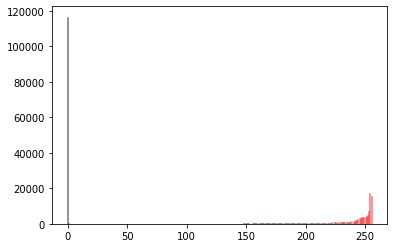

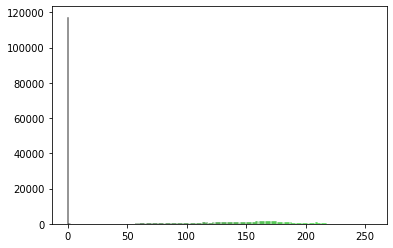

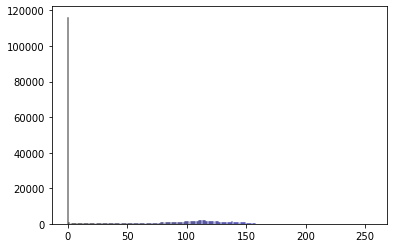

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

def getRed(redVal):
    return '#%02x%02x%02x' % (redVal, 0, 0)

def getGreen(greenVal):
    return '#%02x%02x%02x' % (0, greenVal, 0)

def getBlue(blueVal):
    return '#%02x%02x%02x' % (0, 0, blueVal)
 
# Create an Image with specific RGB value

image = Image.open("/content/imatgefinal.tiff")

# Modify the color of two pixels
image.putpixel((0,1), (1,1,5))
image.putpixel((0,2), (2,1,5))

# Display the image
image.show()

# Get the color histogram of the image
histogram = image.histogram()

# Take only the Red counts
l1 = histogram[0:256]

# Take only the Blue counts
l2 = histogram[256:512]

# Take only the Green counts
l3 = histogram[512:768]

plt.figure(0)

# R histogram

for i in range(0, 256):
    plt.bar(i, l1[i], color = getRed(i), edgecolor=getRed(i), alpha=0.3)

# G histogram

plt.figure(1)

for i in range(0, 256):
    plt.bar(i, l2[i], color = getGreen(i), edgecolor=getGreen(i),alpha=0.3)


# B histogram
plt.figure(2)
for i in range(0, 256):
    plt.bar(i, l3[i], color = getBlue(i), edgecolor=getBlue(i),alpha=0.3)

plt.show()

In [ ]:
Image.open("/content/imatgefinal.tiff").size

(500, 500)